In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import warnings
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('train.csv')

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [3]:
"""cabin data is missing. so we can do 3 actions either leave it as it is or take a mean or put a null value to it. we will drop this from thr data and also the survived lable also.
we will make survived data as target value.
we are taking the mean of age and fill the blanked spaces of age field."""
data.Age.fillna(value = np.round(np.mean(data.Age)), inplace = True)

In [4]:
# Embarked
# only in data, fill the two missing values with the most occurred value, which is "S".
data["Embarked"] = data["Embarked"].fillna("S")
input_data = pd.get_dummies(data.drop(['Cabin', 'Survived','Name', 'Ticket', 'PassengerId'], axis = 1))
print(input_data.head())
print(input_data.info())

   Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  Embarked_C  \
0       3  22.0      1      0   7.2500           0         1           0   
1       1  38.0      1      0  71.2833           1         0           1   
2       3  26.0      0      0   7.9250           1         0           0   
3       1  35.0      1      0  53.1000           1         0           0   
4       3  35.0      0      0   8.0500           0         1           0   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Pclass        891 non-null int64
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Sex_female    891 non-null uint8
Sex_male      891 non-null uint8
Embarked_C    891 non-null uint8
Em

In [5]:
test_data = pd.read_csv('test.csv')
test_data['Age'].fillna(value = np.mean(test_data['Age']), inplace = True)
test_data['Fare'].fillna(value = np.mean(test_data['Fare']), inplace = True)
input_test_data = pd.get_dummies(test_data.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis = 1))
train_y = data.Survived

In [6]:
#model
logisticRegr= LogisticRegression()
logisticRegr.fit(input_data, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [7]:
#Predicting
predicted_prices = logisticRegr.predict(input_test_data)
accuracy=logisticRegr.score(input_data, train_y)
print("Accuracy is:", accuracy)

Accuracy is: 0.8035914702581369


In [8]:
my_submission = pd.DataFrame({'Popularity': predicted_prices})
cross_val=cross_val_score(logisticRegr, input_data, train_y, cv=3, scoring="accuracy")
print("Cross Validation:",cross_val)

Cross Validation: [0.78451178 0.79124579 0.78787879]


In [9]:
y_train_pred = cross_val_predict(logisticRegr, input_data, train_y, cv=3)
conf_mx=confusion_matrix(train_y, y_train_pred)
print("Confussion Matrix:",conf_mx)

Confussion Matrix: [[471  78]
 [111 231]]


In [10]:
ps=precision_score(train_y, y_train_pred,average="macro")
print("precision score:",ps)

precision score: 0.7784255830247222


In [11]:
rs=recall_score(train_y, y_train_pred,average="macro")
print("recall score:",rs)

recall score: 0.7666810468794938


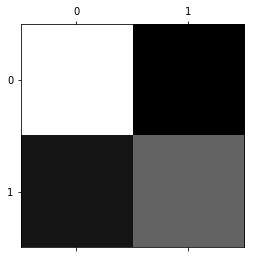

In [12]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [13]:
#Cerating seperate data
my_submission.to_csv('submissionSurvivedLogisticRegression.csv', index=False)